In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [142]:
#input clean csv
header_list = ["Month","County","Rooms_mean","Rooms_Occupied_mean",]
homeless = pd.read_csv("../CleanCSV/Homeless.csv",names=header_list)
county = pd.read_csv("../CleanCSV/County_Summary.csv")
county.head(50)


,Unnamed: 0,County,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,0,Alameda,1684000,Quartile 4,22546.0,0.013388
1,1,Alpine,1061,Quartile 1,3.0,0.002828
2,2,Amador,41047,Quartile 1,313.0,0.007625
3,3,Butte,235354,Quartile 3,3019.0,0.012827
4,4,Calaveras,45522,Quartile 1,267.0,0.005865
5,5,Colusa,21531,Quartile 1,544.0,0.025266
6,6,Contra Costa,1160920,Quartile 4,18120.0,0.015608
7,7,Del Norte,28628,Quartile 1,167.0,0.005833
8,8,El Dorado,194590,Quartile 3,1283.0,0.006593
9,9,Fresno,1010120,Quartile 4,30051.0,0.029750


In [143]:
#clean up county name
county['County'] = county['County'].str.rstrip()

county.head()

,Unnamed: 0,County,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,0,Alameda,1684000,Quartile 4,22546.0,0.013388
1,1,Alpine,1061,Quartile 1,3.0,0.002828
2,2,Amador,41047,Quartile 1,313.0,0.007625
3,3,Butte,235354,Quartile 3,3019.0,0.012827
4,4,Calaveras,45522,Quartile 1,267.0,0.005865


In [149]:
homeless.head()

,Month,County,Rooms_mean,Rooms_Occupied_mean
0,4,Alameda,395.588235,305.352941
1,4,Butte,86.058824,86.058824
2,4,Calaveras,48.533333,22.000000
3,4,Contra Costa,379.000000,165.625000
4,4,Fresno,305.000000,250.000000


In [145]:
#Merge county and homeless_rooms

homeless_room = pd.merge(homeless,county,on="County",how="inner")
homeless_room['Room_Occupied_Pct'] = homeless_room['Rooms_Occupied_mean']/homeless_room['Rooms_mean']
homeless_room

,Month,County,Rooms_mean,Rooms_Occupied_mean,Unnamed: 0,Population 2020,Population Quartiles,Total Cases,Total Cases(%),Room_Occupied_Pct
0,4,Alameda,395.588235,305.352941,0,1684000,Quartile 4,22546.0,0.013388,0.771896
1,5,Alameda,503.965517,369.689655,0,1684000,Quartile 4,22546.0,0.013388,0.733561
2,6,Alameda,624.954545,432.318182,0,1684000,Quartile 4,22546.0,0.013388,0.691759
3,7,Alameda,664.478261,501.043478,0,1684000,Quartile 4,22546.0,0.013388,0.754040
4,8,Alameda,862.400000,572.800000,0,1684000,Quartile 4,22546.0,0.013388,0.664193
...,...,...,...,...,...,...,...,...,...,...
271,8,Tuolumne,21.000000,21.000000,54,55539,Quartile 2,245.0,0.004411,1.000000
272,9,Tuolumne,21.000000,21.000000,54,55539,Quartile 2,245.0,0.004411,1.000000
273,10,Tuolumne,21.000000,21.000000,54,55539,Quartile 2,245.0,0.004411,1.000000
274,9,Siskiyou,11.000000,11.000000,46,43604,Quartile 1,167.0,0.003830,1.000000


In [150]:
#group by Population Quartiles
homeless_room_quartile = homeless_room.groupby(['Population Quartiles','Month'],as_index=False).agg({'Rooms_mean': ['mean'],'Room_Occupied_Pct': ['mean']})

homeless_room_quartile.columns = homeless_room_quartile.columns.droplevel(1)
homeless_room_quartile.head()






,Population Quartiles,Month,Rooms_mean,Room_Occupied_Pct
0,Quartile 1,4,35.177778,0.583606
1,Quartile 1,5,32.800000,0.641052
2,Quartile 1,6,34.878788,0.778737
3,Quartile 1,7,29.369565,0.847025
4,Quartile 1,8,33.883333,0.616325


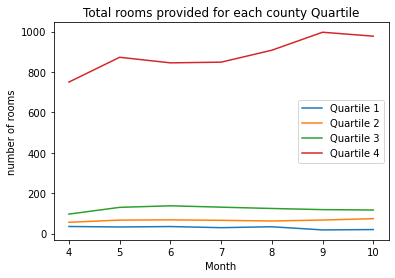

In [147]:

homeless_room_quartile.set_index('Month',inplace=True)
homeless_room_quartile.groupby('Population Quartiles')['Rooms_mean'].plot(legend = True)
plt.legend(loc="best")
plt.title('Total rooms provided for each county Quartile')
plt.ylabel('number of rooms')
plt.savefig("../PNG/Homeless_rooms.png")
plt.show()


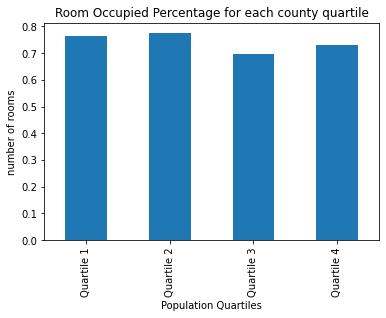

In [148]:

homeless_room_df = homeless_room_quartile.groupby('Population Quartiles')['Room_Occupied_Pct'].mean()

homeless_room_df.plot(kind='bar',legend = False)
plt.title('Room Occupied Percentage for each county quartile')
plt.ylabel('number of rooms')
plt.savefig("../PNG/Homeless_Percentage.png")

plt.show()